## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Read Data

In [2]:
stock_intc = pd.read_csv('INTC.csv')
stock_intc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,45.959999,47.470001,45.770000,47.080002,41.343914,18774600
1,2019-01-03,46.150002,46.279999,44.389999,44.490002,39.069485,32267300
2,2019-01-04,45.840000,47.570000,45.540001,47.220001,41.466862,35447300
3,2019-01-07,47.099998,48.000000,46.750000,47.439999,41.660061,22736800
4,2019-01-08,47.799999,48.029999,46.779999,47.740002,41.923504,22749200
...,...,...,...,...,...,...,...
1113,2023-06-05,31.309999,31.400000,29.830000,29.860001,29.860001,48244100
1114,2023-06-06,29.770000,31.450001,29.700001,30.959999,30.959999,42295300
1115,2023-06-07,31.030001,31.370001,30.930000,31.280001,31.280001,39098000
1116,2023-06-08,31.430000,31.850000,31.059999,31.820000,31.820000,35199000


## Analyst

### Describe

In [3]:
stock_intc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1.118000e+03
mean,48.133390,48.740742,47.541243,48.142531,44.583871,3.171895e+07
std,10.857802,10.950095,10.762543,10.860043,9.252237,1.651977e+07
min,24.730000,25.120001,24.590000,24.900000,24.309347,6.313200e+06
25%,44.202500,44.784999,43.630001,44.284999,40.553207,2.078708e+07
50%,50.240002,50.955000,49.720000,50.315000,46.127603,2.840440e+07
75%,56.057501,56.530001,55.475001,55.985002,51.648993,3.744282e+07
max,68.199997,69.290001,67.309998,68.470001,63.348770,1.822699e+08


### Visualization

#### Histogram

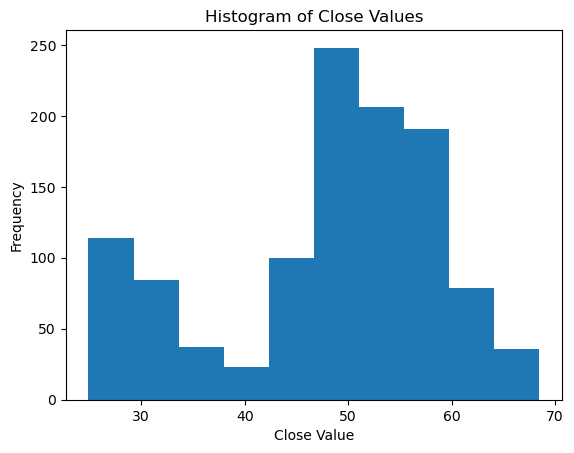

In [4]:
plt.hist(stock_intc['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

#### Boxplot

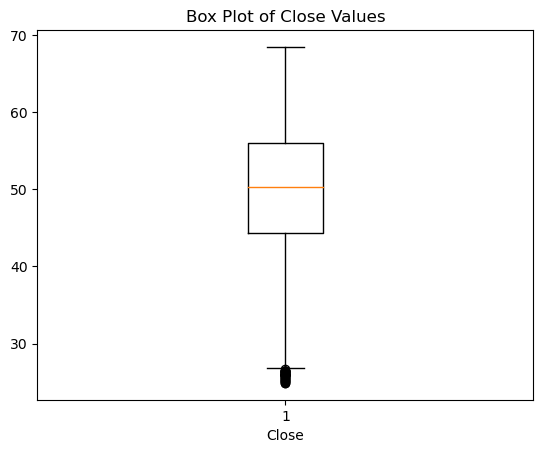

In [5]:
plt.boxplot(stock_intc['Close'])

plt.title("Box Plot of Close Values")
plt.xlabel("Close")

plt.show()

#### Initial Close Values

In [6]:
# Convert the 'Date' column to datetime format
stock_intc['Date'] = pd.to_datetime(stock_intc['Date'])

# Set the 'Date' column as the index value
stock_intc = stock_intc.set_index(pd.DatetimeIndex(stock_intc['Date'].values))

# Delete Date from Dataframe
stock_intc = stock_intc.drop('Date', axis=1)

In [ ]:
decomposition = sm.tsa.seasonal_decompose(stock_intc['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

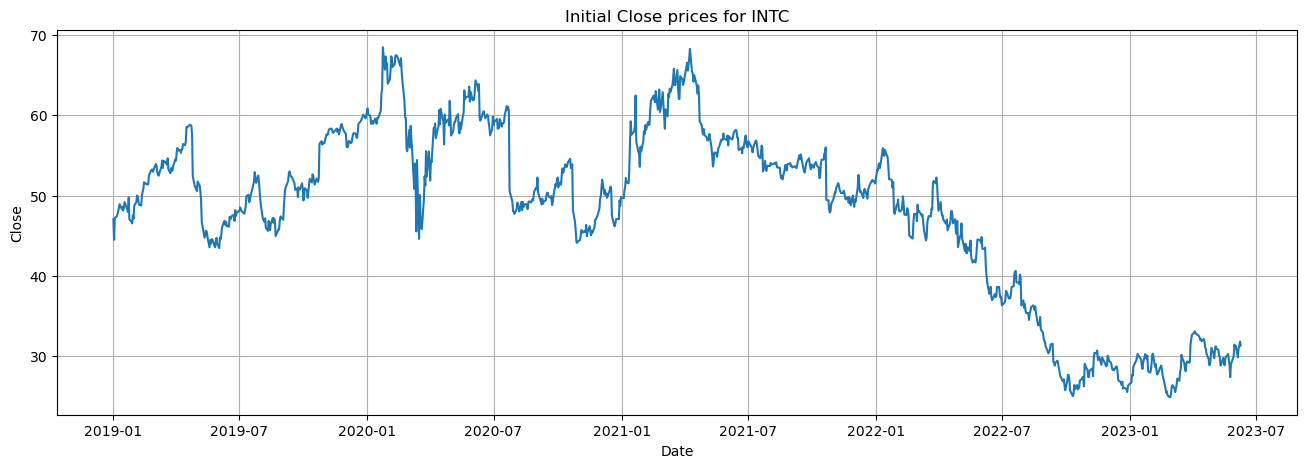

In [7]:
plt.figure(figsize=(16,5))

plt.plot(stock_intc.index, stock_intc['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for INTC')
plt.grid()
plt.show()